# Classificação de sinais de trânsito


Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# Etapa 1: Importação das bibliotecas


In [1]:
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install tensorflow --upgrade


In [2]:
import zipfile
import random
from tensorflow.keras import layers
import tensorflow as tf
import seaborn as sns
import PIL
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 2.x
tf.__version__


UsageError: Line magic function `%tensorflow_version` not found.


# Etapa 2: Importação da base de dados


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
path = 'data/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./data')
zip_object.close()


In [5]:
with open('data/traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('data/traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open('data/traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)


In [6]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [7]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']


In [8]:
print(X_train.shape, "\n", y_train.shape)


(34799, 32, 32, 3) 
 (34799,)


In [9]:
X_test.shape


(12630, 32, 32, 3)

In [10]:
X_validation.shape


(4410, 32, 32, 3)

# Etapa 3: Visualização dos dados


5

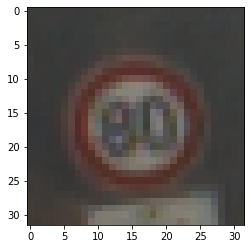

In [11]:
i = random.randint(1, 34799)
plt.imshow(X_train[i])
y_train[i]


3

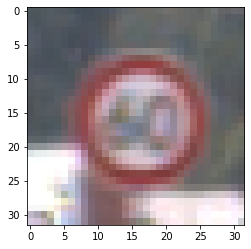

In [12]:
i = random.randint(1, 12630)
plt.imshow(X_test[i])
y_test[i]


14

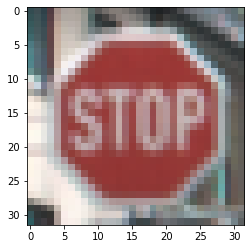

In [13]:
i = random.randint(1, 4410)
plt.imshow(X_validation[i])
y_validation[i]


# Etapa 4: Preparação dos dados


In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [15]:
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis=3, keepdims=True)


In [16]:
X_train_gray.shape


(34799, 32, 32, 1)

In [17]:
X_test_gray.shape


(12630, 32, 32, 1)

In [18]:
X_validation_gray.shape


(4410, 32, 32, 1)

In [19]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128


In [20]:
np.max(X_train_gray_norm)


0.9921875

In [21]:
np.min(X_train_gray_norm)


-0.9713541666666666

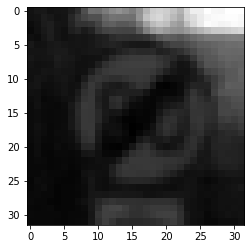

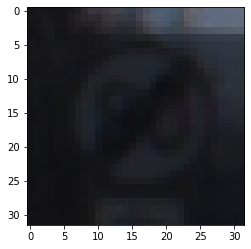

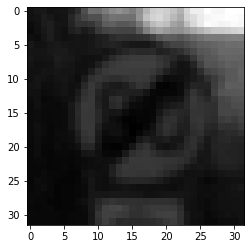

In [22]:
i = random.randint(1, 34799)
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')


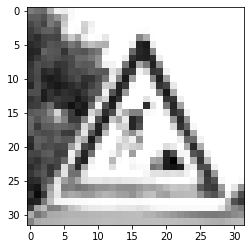

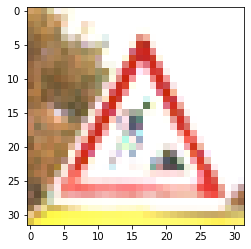

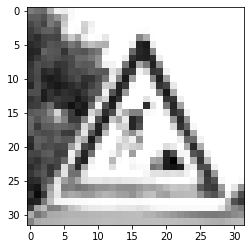

In [23]:
i = random.randint(1, 12630)
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')


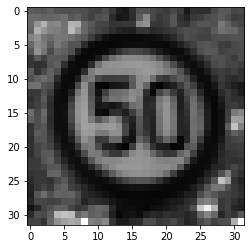

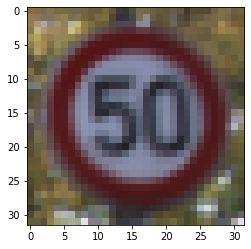

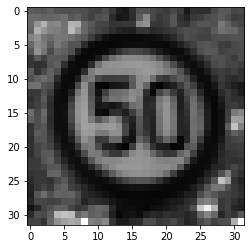

In [24]:
i = random.randint(1, 4410)
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')


# Etapa 5: Criação do modelo e treinamento


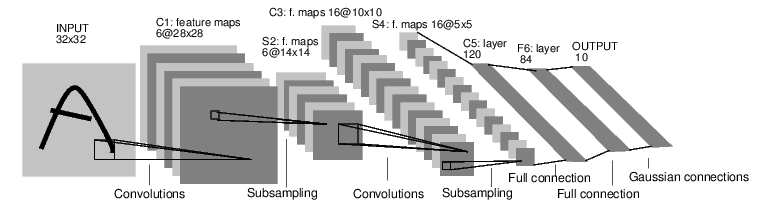


In [25]:
from tensorflow.keras import layers, models


In [26]:
LeNet = models.Sequential()


2021-12-12 15:57:41.867989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 15:57:42.136756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 15:57:42.137026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 15:57:42.138302: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

- Passo 1: THE FIRST CONVOLUTIONAL LAYER #1
  - Input = 32x32x1
  - Output = 28x28x6
  - Output = (Input-filter+1)/Stride\* => (32-5+1)/1=28
  - Used a 5x5 Filter with input depth of 3 and output depth of 6
  - Apply a RELU Activation function to the output
  - pooling for input, Input = 28x28x6 and Output = 14x14x6


In [27]:
LeNet.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
LeNet.add(layers.AveragePooling2D())


- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
  - Input = 14x14x6
  - Output = 10x10x16
  - Layer 2: Convolutional layer with Output = 10x10x16
  - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
  - Apply a RELU Activation function to the output
  - Pooling with Input = 10x10x16 and Output = 5x5x16


In [28]:
LeNet.add(layers.Conv2D(16, (5, 5), activation='relu'))
LeNet.add(layers.AveragePooling2D())


- STEP 3: FLATTENING THE NETWORK
  - Flatten the network with Input = 5x5x16 and Output = 400


In [29]:
LeNet.add(layers.Flatten())


- STEP 4: FULLY CONNECTED LAYER
  - Layer 3: Fully Connected layer with Input = 400 and Output = 120
  - Apply a RELU Activation function to the output


In [30]:
LeNet.add(layers.Dense(120, activation='relu'))


- STEP 5: ANOTHER FULLY CONNECTED LAYER
  - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
  - Apply a RELU Activation function to the output


In [31]:
LeNet.add(layers.Dense(84, activation='relu'))


- STEP 6: FULLY CONNECTED LAYER
  - Layer 5: Fully Connected layer with Input = 84 and Output = 43


In [32]:
LeNet.add(layers.Dense(43, activation='softmax'))


In [33]:
LeNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [34]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
# %% time
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=50,
                    validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/50


2021-12-12 15:57:47.114397: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


70/70 [==============================] - 6s 11ms/step - loss: 3.2039 - accuracy: 0.1705 - val_loss: 2.7514 - val_accuracy: 0.2862
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 1.6425 - accuracy: 0.5459 - val_loss: 1.3959 - val_accuracy: 0.5825
Epoch 3/50
70/70 [==============================] - 1s 8ms/step - loss: 0.8910 - accuracy: 0.7424 - val_loss: 0.9864 - val_accuracy: 0.7059
Epoch 4/50
70/70 [==============================] - 1s 7ms/step - loss: 0.6403 - accuracy: 0.8215 - val_loss: 0.7924 - val_accuracy: 0.7662
Epoch 5/50
70/70 [==============================] - 0s 7ms/step - loss: 0.5088 - accuracy: 0.8590 - val_loss: 0.7400 - val_accuracy: 0.7909
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.4272 - accuracy: 0.8841 - val_loss: 0.6825 - val_accuracy: 0.7989
Epoch 7/50
70/70 [==============================] - 0s 7ms/step - loss: 0.3618 - accuracy: 0.9024 - val_loss: 0.6691 - val_accuracy: 0.8070
Epoch 8/50
70/70 [============

# Etapa 6: Avaliação do modelo


In [36]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))


395/395 [==============================] - 1s 2ms/step - loss: 1.2294 - accuracy: 0.8682
Test Accuracy: 0.8681710362434387


In [37]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [39]:
accuracy


[0.17052213847637177,
 0.5459064841270447,
 0.7423776388168335,
 0.8214890956878662,
 0.8589901924133301,
 0.8840771317481995,
 0.9023535251617432,
 0.9121813774108887,
 0.9251415133476257,
 0.9339348673820496,
 0.9416075348854065,
 0.9458892345428467,
 0.9533320069313049,
 0.9585620164871216,
 0.9627000689506531,
 0.9623839855194092,
 0.967987596988678,
 0.9702290296554565,
 0.971981942653656,
 0.9740222692489624,
 0.978648841381073,
 0.9796833395957947,
 0.9806603789329529,
 0.9819247722625732,
 0.9822408556938171,
 0.9841949343681335,
 0.9862927198410034,
 0.9876145720481873,
 0.9867812395095825,
 0.9829592704772949,
 0.9873272180557251,
 0.9886490702629089,
 0.9912641048431396,
 0.9906031489372253,
 0.9911491870880127,
 0.9924997687339783,
 0.9924710392951965,
 0.9918963313102722,
 0.9902870655059814,
 0.992729663848877,
 0.9935343265533447,
 0.9940228462219238,
 0.9955458641052246,
 0.9965516328811646,
 0.9948561787605286,
 0.9921262264251709,
 0.9936492443084717,
 0.9959769248962

/tmp/ipykernel_3031/1936345582.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color='r', label='Training Accuracy')


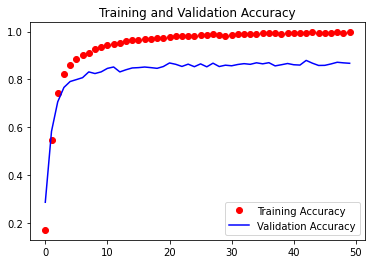

In [40]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color='r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


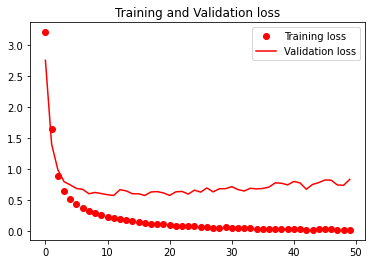

In [41]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()


In [42]:
predicted_classes = np.argmax(LeNet.predict(X_test_gray_norm), axis=1)

y_true = y_test


<AxesSubplot:>

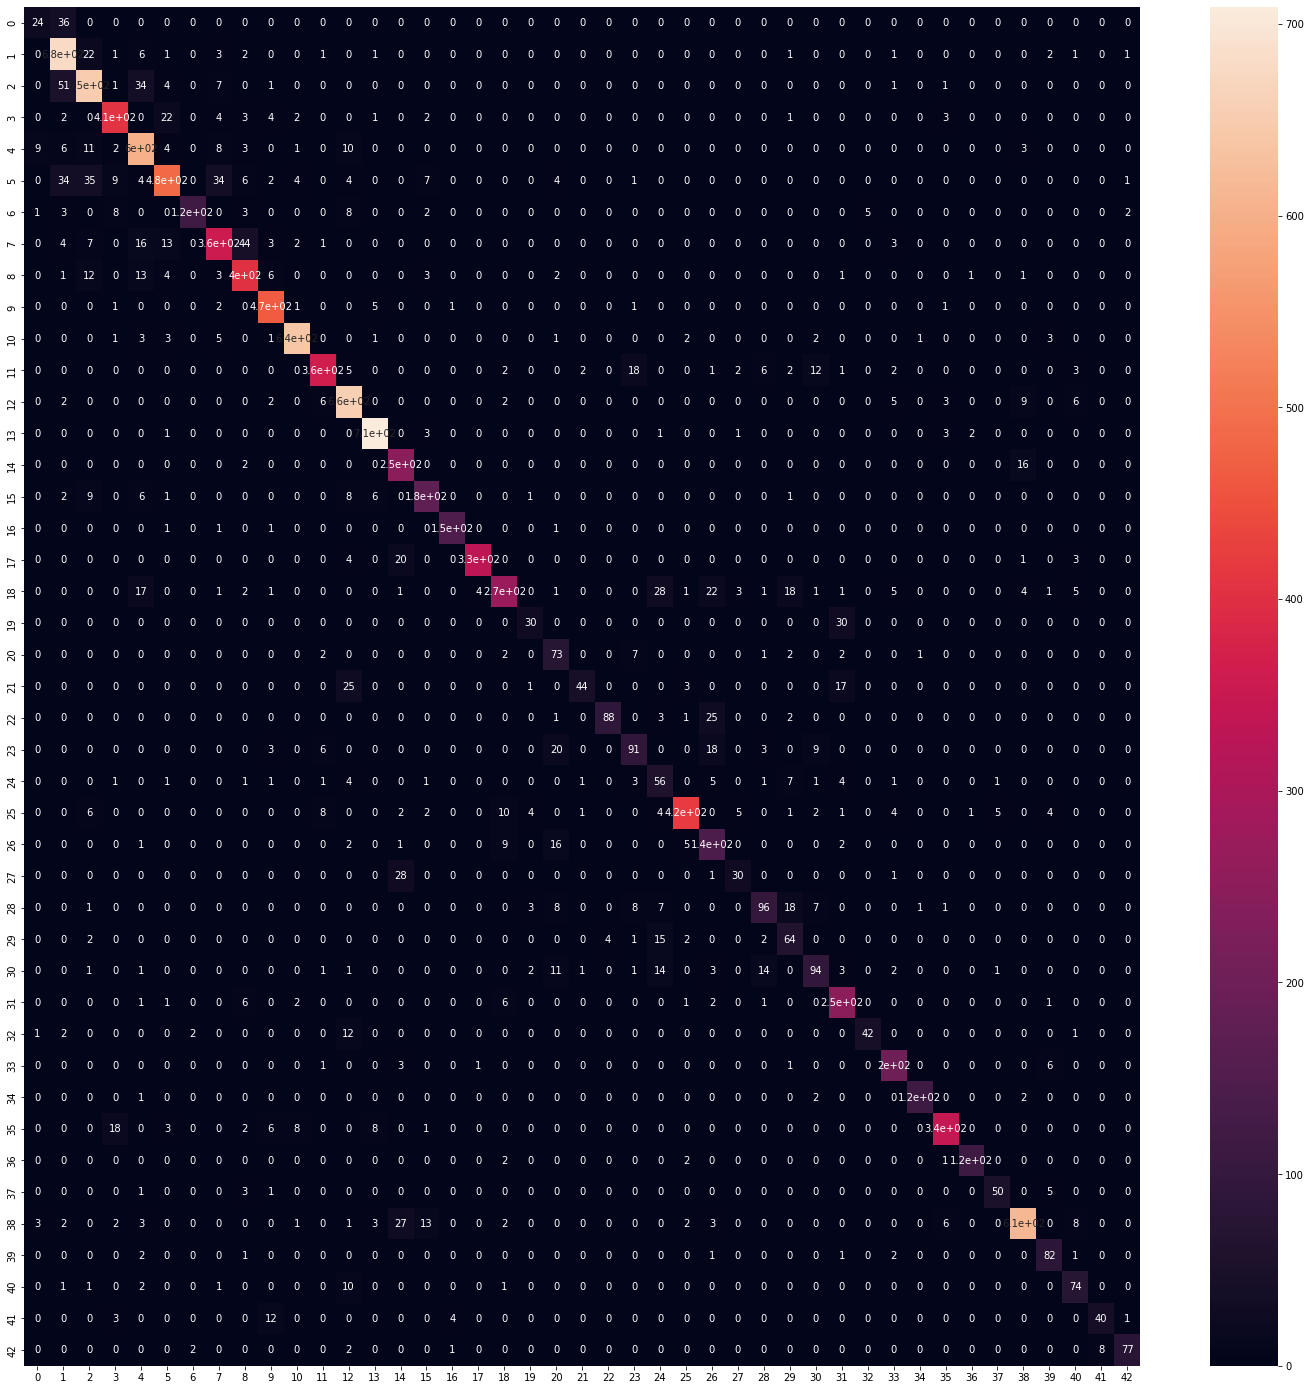

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)


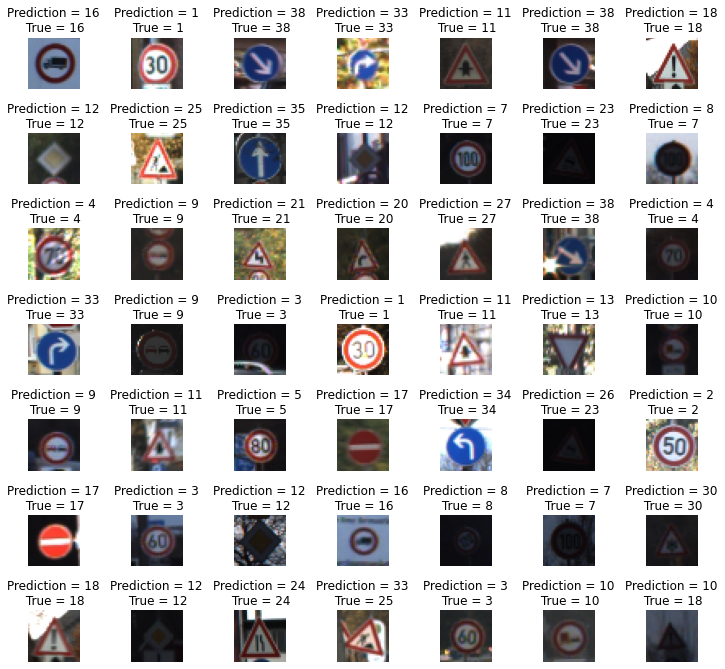

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(
        predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
